In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap,TSNE
from sklearn.feature_selection import mutual_info_classif
from tqdm.notebook import tqdm
from scipy.stats import ttest_ind
import scipy.stats as stats
import datetime as dt
from lightgbm import LGBMClassifier
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [2]:
Data=pd.read_csv('dataset/train.csv');

In [3]:
Data

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15192,PID0x4581,11.0,Yes,Yes,NaN,No,4.917164,Joseph,Fridley,Oran,...,Multiple,7.200470,NaN,0.0,1.0,1.0,NaN,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
15193,PID0x973b,14.0,No,Yes,No,No,4.957805,Paul,Beckman,Safi,...,Singular,6.752858,normal,1.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
15194,PID0x2eaa,6.0,No,No,No,Yes,4.753484,Diane,NaN,Mishaun,...,Multiple,9.165363,normal,0.0,1.0,0.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
15195,PID0x6e6d,14.0,No,Yes,No,Yes,4.985682,David,Acosta,Stas,...,Singular,4.617553,normal,1.0,0.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome


In [4]:
Data.drop(["Patient Id","Patient First Name","Family Name","Father's name","Location of Institute",
          "Institute Name","Test 1","Test 2","Test 3","Test 4","Test 5","Symptom 1","Symptom 2",
           "Symptom 3","Symptom 4","Symptom 5"],inplace=True,axis=1)

In [5]:
Data["Birth asphyxia"] = Data["Birth asphyxia"].replace("No record",np.NaN)
Data["Birth asphyxia"] = Data["Birth asphyxia"].replace("Not available",np.NaN)

Data["Autopsy shows birth defect (if applicable)"] = Data["Autopsy shows birth defect (if applicable)"].replace("None",np.NaN)
Data["Autopsy shows birth defect (if applicable)"] = Data["Autopsy shows birth defect (if applicable)"].replace("Not applicable",np.NaN)

Data["H/O radiation exposure (x-ray)"] = Data["H/O radiation exposure (x-ray)"].replace("Not applicable",np.NaN)
Data["H/O radiation exposure (x-ray)"] = Data["H/O radiation exposure (x-ray)"].replace("-",np.NaN)

Data["H/O substance abuse"] = Data["H/O substance abuse"].replace("Not applicable",np.NaN)
Data["H/O substance abuse"] = Data["H/O substance abuse"].replace("-",np.NaN)

In [6]:
Data.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"},inplace=True)

In [7]:
Data.rename(columns={"Inherited from father":"Inherited_Father",
                    "Maternal gene":"Maternal_Gene"},inplace=True)

In [8]:
Data.sort_values(by=["Patient_Age"],inplace=True)

In [9]:
Data.dropna(inplace=True,axis=0)

In [10]:
Data = Data.reset_index(drop=True)

In [11]:
print(Data.isna().sum())

Patient_Age                     0
Genes_Mother_Side               0
Inherited_Father                0
Maternal_Gene                   0
Paternal_Gene                   0
Blood_Cell_mcL                  0
Mother_Age                      0
Father_Age                      0
Status                          0
Respiratory_Rate_Breaths_Min    0
Heart_Rates_Min                 0
Parental_Consent                0
Follow_Up                       0
Gender                          0
Birth_Asphyxia                  0
Autopsy_Birth_Defect            0
Place_Birth                     0
Folic_Acid                      0
Maternal_Illness                0
Radiation_Exposure              0
Substance_Abuse                 0
Assisted_Conception             0
History_Previous_Pregnancies    0
Previous_Abortion               0
Birth_Defects                   0
White_Blood_Cell                0
Blood_Test_Result               0
Genetic_Disorder                0
Disorder_Subclass               0
dtype: int64


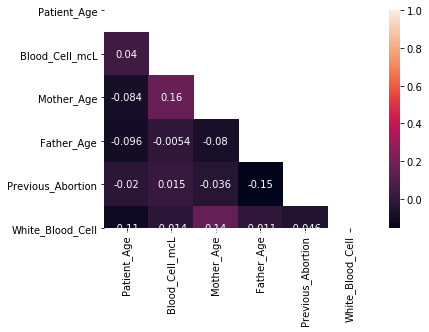

In [12]:
import seaborn as sns
corr = Data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True)
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020798754748>,
      dtype=object)

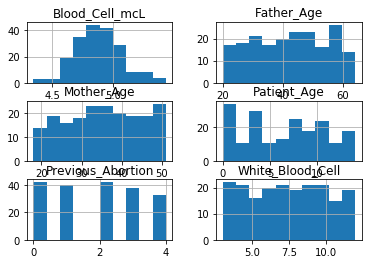

In [13]:
Data.hist()

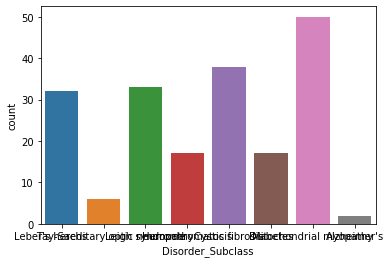

In [14]:
sns.countplot(x = 'Disorder_Subclass',data = Data)


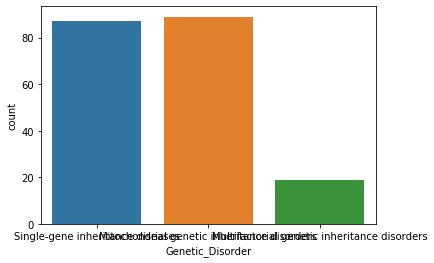

In [15]:
sns.countplot(x = 'Genetic_Disorder',data = Data)

In [16]:
Encode_Data = Data.copy()

Encode_Func = LabelEncoder()

Encode_Data["Genes_Mother_Side"] = Encode_Func.fit_transform(Encode_Data["Genes_Mother_Side"])
Encode_Data["Inherited_Father"] = Encode_Func.fit_transform(Encode_Data["Inherited_Father"])
Encode_Data["Maternal_Gene"] = Encode_Func.fit_transform(Encode_Data["Maternal_Gene"])
Encode_Data["Paternal_Gene"] = Encode_Func.fit_transform(Encode_Data["Paternal_Gene"])
Encode_Data["Status"] = Encode_Func.fit_transform(Encode_Data["Status"])
Encode_Data["Respiratory_Rate_Breaths_Min"] = Encode_Func.fit_transform(Encode_Data["Respiratory_Rate_Breaths_Min"])
Encode_Data["Heart_Rates_Min"] = Encode_Func.fit_transform(Encode_Data["Heart_Rates_Min"])
Encode_Data["Follow_Up"] = Encode_Func.fit_transform(Encode_Data["Follow_Up"])
Encode_Data["Gender"] = Encode_Func.fit_transform(Encode_Data["Gender"])
Encode_Data["Birth_Asphyxia"] = Encode_Func.fit_transform(Encode_Data["Birth_Asphyxia"])
Encode_Data["Autopsy_Birth_Defect"] = Encode_Func.fit_transform(Encode_Data["Autopsy_Birth_Defect"])
Encode_Data["Place_Birth"] = Encode_Func.fit_transform(Encode_Data["Place_Birth"])
Encode_Data["Folic_Acid"] = Encode_Func.fit_transform(Encode_Data["Folic_Acid"])
Encode_Data["Maternal_Illness"] = Encode_Func.fit_transform(Encode_Data["Maternal_Illness"])
Encode_Data["Radiation_Exposure"] = Encode_Func.fit_transform(Encode_Data["Radiation_Exposure"])
Encode_Data["Substance_Abuse"] = Encode_Func.fit_transform(Encode_Data["Substance_Abuse"])
Encode_Data["Assisted_Conception"] = Encode_Func.fit_transform(Encode_Data["Assisted_Conception"])
Encode_Data["History_Previous_Pregnancies"] = Encode_Func.fit_transform(Encode_Data["History_Previous_Pregnancies"])
Encode_Data["Birth_Defects"] = Encode_Func.fit_transform(Encode_Data["Birth_Defects"])
Encode_Data["Blood_Test_Result"] = Encode_Func.fit_transform(Encode_Data["Blood_Test_Result"])
Encode_Data["Genetic_Disorder"] = Encode_Func.fit_transform(Encode_Data["Genetic_Disorder"])
Encode_Data["Disorder_Subclass"] = Encode_Func.fit_transform(Encode_Data["Disorder_Subclass"])
Encode_Data["Parental_Consent"] = Encode_Func.fit_transform(Encode_Data["Parental_Consent"])

Encode_Data = Encode_Data.astype("float32")

In [17]:
Encode_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 29 columns):
Patient_Age                     195 non-null float32
Genes_Mother_Side               195 non-null float32
Inherited_Father                195 non-null float32
Maternal_Gene                   195 non-null float32
Paternal_Gene                   195 non-null float32
Blood_Cell_mcL                  195 non-null float32
Mother_Age                      195 non-null float32
Father_Age                      195 non-null float32
Status                          195 non-null float32
Respiratory_Rate_Breaths_Min    195 non-null float32
Heart_Rates_Min                 195 non-null float32
Parental_Consent                195 non-null float32
Follow_Up                       195 non-null float32
Gender                          195 non-null float32
Birth_Asphyxia                  195 non-null float32
Autopsy_Birth_Defect            195 non-null float32
Place_Birth                     195 non-null fl

In [18]:
Encode_Data

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Radiation_Exposure,Substance_Abuse,Assisted_Conception,History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_Test_Result,Genetic_Disorder,Disorder_Subclass
0,0.0,0.0,0.0,0.0,1.0,4.825270,28.0,61.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,8.603042,2.0,2.0,7.0
1,0.0,0.0,0.0,1.0,0.0,5.032100,22.0,57.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,7.242334,0.0,0.0,4.0
2,0.0,1.0,0.0,1.0,0.0,4.850370,48.0,34.0,0.0,1.0,...,0.0,1.0,0.0,0.0,3.0,0.0,6.000330,0.0,0.0,5.0
3,0.0,1.0,0.0,0.0,0.0,4.871952,33.0,44.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,4.101177,0.0,2.0,3.0
4,0.0,0.0,0.0,0.0,1.0,5.034000,39.0,44.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.0,0.0,3.000000,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,14.0,1.0,0.0,1.0,1.0,4.991490,51.0,40.0,0.0,0.0,...,1.0,1.0,1.0,0.0,4.0,1.0,12.000000,0.0,1.0,0.0
191,14.0,0.0,0.0,0.0,0.0,4.818157,47.0,23.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,4.726898,2.0,2.0,7.0
192,14.0,1.0,0.0,1.0,0.0,4.766609,40.0,41.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,6.563484,3.0,1.0,2.0
193,14.0,0.0,0.0,1.0,1.0,4.888885,29.0,47.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,4.495051,0.0,0.0,6.0


In [19]:
Genetic_Disorder_Data = Encode_Data.drop("Disorder_Subclass",axis=1)

In [20]:
Disorder_Subclass_Data = Encode_Data.drop("Genetic_Disorder",axis=1)

In [21]:
Genetic_Disorder_Data

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Maternal_Illness,Radiation_Exposure,Substance_Abuse,Assisted_Conception,History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_Test_Result,Genetic_Disorder
0,0.0,0.0,0.0,0.0,1.0,4.825270,28.0,61.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.603042,2.0,2.0
1,0.0,0.0,0.0,1.0,0.0,5.032100,22.0,57.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7.242334,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,4.850370,48.0,34.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,3.0,0.0,6.000330,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,4.871952,33.0,44.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,4.101177,0.0,2.0
4,0.0,0.0,0.0,0.0,1.0,5.034000,39.0,44.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,0.0,3.000000,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,14.0,1.0,0.0,1.0,1.0,4.991490,51.0,40.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,4.0,1.0,12.000000,0.0,1.0
191,14.0,0.0,0.0,0.0,0.0,4.818157,47.0,23.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.726898,2.0,2.0
192,14.0,1.0,0.0,1.0,0.0,4.766609,40.0,41.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.563484,3.0,1.0
193,14.0,0.0,0.0,1.0,1.0,4.888885,29.0,47.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.495051,0.0,0.0


In [22]:
Disorder_Subclass_Data

,Patient_Age,Genes_Mother_Side,Inherited_Father,Maternal_Gene,Paternal_Gene,Blood_Cell_mcL,Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Maternal_Illness,Radiation_Exposure,Substance_Abuse,Assisted_Conception,History_Previous_Pregnancies,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_Test_Result,Disorder_Subclass
0,0.0,0.0,0.0,0.0,1.0,4.825270,28.0,61.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8.603042,2.0,7.0
1,0.0,0.0,0.0,1.0,0.0,5.032100,22.0,57.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7.242334,0.0,4.0
2,0.0,1.0,0.0,1.0,0.0,4.850370,48.0,34.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,3.0,0.0,6.000330,0.0,5.0
3,0.0,1.0,0.0,0.0,0.0,4.871952,33.0,44.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,4.101177,0.0,3.0
4,0.0,0.0,0.0,0.0,1.0,5.034000,39.0,44.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,0.0,3.000000,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,14.0,1.0,0.0,1.0,1.0,4.991490,51.0,40.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,4.0,1.0,12.000000,0.0,0.0
191,14.0,0.0,0.0,0.0,0.0,4.818157,47.0,23.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.726898,2.0,7.0
192,14.0,1.0,0.0,1.0,0.0,4.766609,40.0,41.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.563484,3.0,2.0
193,14.0,0.0,0.0,1.0,1.0,4.888885,29.0,47.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.495051,0.0,6.0


In [23]:
GENETIC_X =  Genetic_Disorder_Data.drop("Genetic_Disorder",axis=1)
GENETIC_Y = Genetic_Disorder_Data["Genetic_Disorder"]

In [24]:
GX_Train,GX_Test,GY_Train,GY_Test = train_test_split(GENETIC_X,GENETIC_Y,test_size=0.2,random_state=42,shuffle=True)

In [25]:
print("X TRAIN SHAPE: ",GX_Train.shape)
print("X TEST SHAPE: ",GX_Test.shape)
print("Y TRAIN SHAPE: ",GY_Train.shape)
print("Y TEST SHAPE: ",GY_Test.shape)

X TRAIN SHAPE:  (156, 27)
X TEST SHAPE:  (39, 27)
Y TRAIN SHAPE:  (156,)
Y TEST SHAPE:  (39,)


In [26]:
Scaler_Function = StandardScaler()
GX_Train = Scaler_Function.fit_transform(GX_Train)
GX_Test = Scaler_Function.fit_transform(GX_Test)


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, GX_Train,GX_Test, GY_Train, GY_Test):
    y_test_pred = model.predict(GX_Test)
    y_train_pred = model.predict(GX_Train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(GY_Train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(GY_Train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(GY_Test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(GY_Test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(GY_Test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [28]:
l= LogisticRegression(solver="liblinear").fit(GX_Train,GY_Train)
predictions = l.predict(GX_Test)
lr = (accuracy_score(GY_Test, predictions)*100)
print("*Accuracy score for LogisticRegression : ", lr, "\n")
print("*Confusion Matrix for LogisticRegression: ")
print(confusion_matrix(GY_Test, predictions))
print("*Classification Report for LogisticRegression: ")
print(classification_report(GY_Test, predictions))

C:\Users\ABHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


*Accuracy score for LogisticRegression :  46.15384615384615 

*Confusion Matrix for LogisticRegression: 
[[ 9  1 10]
 [ 2  0  1]
 [ 7  0  9]]
*Classification Report for LogisticRegression: 
              precision    recall  f1-score   support

         0.0       0.50      0.45      0.47        20
         1.0       0.00      0.00      0.00         3
         2.0       0.45      0.56      0.50        16

    accuracy                           0.46        39
   macro avg       0.32      0.34      0.32        39
weighted avg       0.44      0.46      0.45        39



In [29]:
rf = RandomForestClassifier(random_state=42,verbose=False).fit(GX_Train,GY_Train)
predictions = rf.predict(GX_Test)
rfc = (accuracy_score(GY_Test, predictions)*100)
print("*Accuracy score for RandomForestClassifier : ", rfc, "\n")
print("*Confusion Matrix for RandomForestClassifier: ")
print(confusion_matrix(GY_Test, predictions))
print("*Classification Report for RandomForestClassifier: ")
print(classification_report(GY_Test, predictions))

C:\Users\ABHI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


*Accuracy score for RandomForestClassifier :  58.97435897435898 

*Confusion Matrix for RandomForestClassifier: 
[[12  0  8]
 [ 3  0  0]
 [ 4  1 11]]
*Classification Report for RandomForestClassifier: 
              precision    recall  f1-score   support

         0.0       0.63      0.60      0.62        20
         1.0       0.00      0.00      0.00         3
         2.0       0.58      0.69      0.63        16

    accuracy                           0.59        39
   macro avg       0.40      0.43      0.41        39
weighted avg       0.56      0.59      0.57        39



In [30]:
dt = DecisionTreeClassifier(random_state=42).fit(GX_Train,GY_Train)
predictions = dt.predict(GX_Test)
dtc = (accuracy_score(GY_Test, predictions)*100)
print("*Accuracy score for DecisionTreeClassifier : ", dtc, "\n")
print("*Confusion Matrix for DecisionTreeClassifier: ")
print(confusion_matrix(GY_Test, predictions))
print("*Classification Report for DecisionTreeClassifier: ")
print(classification_report(GY_Test, predictions))

*Accuracy score for DecisionTreeClassifier :  33.33333333333333 

*Confusion Matrix for DecisionTreeClassifier: 
[[ 8  2 10]
 [ 1  0  2]
 [ 9  2  5]]
*Classification Report for DecisionTreeClassifier: 
              precision    recall  f1-score   support

         0.0       0.44      0.40      0.42        20
         1.0       0.00      0.00      0.00         3
         2.0       0.29      0.31      0.30        16

    accuracy                           0.33        39
   macro avg       0.25      0.24      0.24        39
weighted avg       0.35      0.33      0.34        39



In [31]:
knn = KNeighborsClassifier().fit(GX_Train,GY_Train)
predictions = knn.predict(GX_Test)
knnc = (accuracy_score(GY_Test, predictions)*100)
print("*Accuracy score for KNeighborsClassifier : ", knnc, "\n")
print("*Confusion Matrix for KNeighborsClassifier: ")
print(confusion_matrix(GY_Test, predictions))
print("*Classification Report for KNeighborsClassifier: ")
print(classification_report(GY_Test, predictions))

*Accuracy score for KNeighborsClassifier :  33.33333333333333 

*Confusion Matrix for KNeighborsClassifier: 
[[ 9  0 11]
 [ 1  0  2]
 [11  1  4]]
*Classification Report for KNeighborsClassifier: 
              precision    recall  f1-score   support

         0.0       0.43      0.45      0.44        20
         1.0       0.00      0.00      0.00         3
         2.0       0.24      0.25      0.24        16

    accuracy                           0.33        39
   macro avg       0.22      0.23      0.23        39
weighted avg       0.32      0.33      0.32        39



In [32]:
sv=SVC(gamma ='auto', probability = True).fit(GX_Train,GY_Train)
predictions = sv.predict(GX_Test)
svc = (accuracy_score(GY_Test, predictions)*100)
print("*Accuracy score for SupportVectorClassifier : ", svc, "\n")
print("*Confusion Matrix for SupportVectorClassifier: ")
print(confusion_matrix(GY_Test, predictions))
print("*Classification Report for SupportVectorClassifier: ")
print(classification_report(GY_Test, predictions))


*Accuracy score for SupportVectorClassifier :  53.84615384615385 

*Confusion Matrix for SupportVectorClassifier: 
[[12  0  8]
 [ 2  0  1]
 [ 7  0  9]]
*Classification Report for SupportVectorClassifier: 


C:\Users\ABHI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.57      0.60      0.59        20
         1.0       0.00      0.00      0.00         3
         2.0       0.50      0.56      0.53        16

    accuracy                           0.54        39
   macro avg       0.36      0.39      0.37        39
weighted avg       0.50      0.54      0.52        39



In [33]:
gnb = GaussianNB().fit(GX_Train,GY_Train)
predictions = gnb.predict(GX_Test)
gnbc = (accuracy_score(GY_Test, predictions)*100)
print("*Accuracy score for GaussianNBClassifier : ", gnbc , "\n")
print("*Confusion Matrix for GaussianNBClassifier: ")
print(confusion_matrix(GY_Test, predictions))
print("*Classification Report for GaussianNBClassifier: ")
print(classification_report(GY_Test, predictions))

*Accuracy score for GaussianNBClassifier :  46.15384615384615 

*Confusion Matrix for GaussianNBClassifier: 
[[ 9  1 10]
 [ 2  0  1]
 [ 6  1  9]]
*Classification Report for GaussianNBClassifier: 
              precision    recall  f1-score   support

         0.0       0.53      0.45      0.49        20
         1.0       0.00      0.00      0.00         3
         2.0       0.45      0.56      0.50        16

    accuracy                           0.46        39
   macro avg       0.33      0.34      0.33        39
weighted avg       0.46      0.46      0.45        39



In [34]:
gb = GradientBoostingClassifier(verbose=False).fit(GX_Train,GY_Train)
predictions = gb.predict(GX_Test)
gbc = (accuracy_score(GY_Test, predictions)*100)
print("*Accuracy score for GradientBoostingClassifier : ", gbc, "\n")
print("*Confusion Matrix for GradientBoostingClassifier: ")
print(confusion_matrix(GY_Test, predictions))
print("*Classification Report for GradientBoostingClassifier: ")
print(classification_report(GY_Test, predictions))

*Accuracy score for GradientBoostingClassifier :  43.58974358974359 

*Confusion Matrix for GradientBoostingClassifier: 
[[10  0 10]
 [ 0  0  3]
 [ 8  1  7]]
*Classification Report for GradientBoostingClassifier: 
              precision    recall  f1-score   support

         0.0       0.56      0.50      0.53        20
         1.0       0.00      0.00      0.00         3
         2.0       0.35      0.44      0.39        16

    accuracy                           0.44        39
   macro avg       0.30      0.31      0.31        39
weighted avg       0.43      0.44      0.43        39



In [35]:
xgb = XGBClassifier().fit(GX_Train,GY_Train)
predictions = xgb.predict(GX_Test)
xgbc = (accuracy_score(GY_Test, predictions)*100)
print("*Accuracy score for XGBClassifier : ", xgbc, "\n")
print("*Confusion Matrix for XGBClassifier: ")
print(confusion_matrix(GY_Test, predictions))
print("*Classification Report for XGBClassifier: ")
print(classification_report(GY_Test, predictions))

*Accuracy score for XGBClassifier :  43.58974358974359 

*Confusion Matrix for XGBClassifier: 
[[ 9  1 10]
 [ 1  0  2]
 [ 8  0  8]]
*Classification Report for XGBClassifier: 
              precision    recall  f1-score   support

         0.0       0.50      0.45      0.47        20
         1.0       0.00      0.00      0.00         3
         2.0       0.40      0.50      0.44        16

    accuracy                           0.44        39
   macro avg       0.30      0.32      0.31        39
weighted avg       0.42      0.44      0.43        39



In [36]:
estimator = []
estimator.append(('LR',
                  LogisticRegression(solver ='lbfgs',
                                     multi_class ='multinomial',
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(GX_Train,GY_Train)
predictions = vot_hard.predict(GX_Test)
vc = (accuracy_score(GY_Test, predictions)*100)
print("*Accuracy score for Voting Classifier: ", vc, "\n")
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(GY_Test, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(GY_Test, predictions))

*Accuracy score for Voting Classifier:  46.15384615384615 

*Confusion Matrix for Voting Classifier: 
[[10  0 10]
 [ 2  0  1]
 [ 8  0  8]]
*Classification Report for Voting Classifier: 


C:\Users\ABHI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50        20
         1.0       0.00      0.00      0.00         3
         2.0       0.42      0.50      0.46        16

    accuracy                           0.46        39
   macro avg       0.31      0.33      0.32        39
weighted avg       0.43      0.46      0.44        39



In [37]:
modelsc = [lr,rfc,dtc,knnc,svc,gnbc,gbc,xgbc,vc]

In [38]:
score = [lr,rfc,dtc,knnc,svc,gnbc,gbc,xgbc,vc]
#make variabel for save the result and to show it
classifier = ('Logistic Regression','Random Forest','Decision Tree','KNNeighbors','Suport Vector Machine','Gaussian Naive Bayes Classifier','Gradient boosting Algorithm','XGboost Algorithm','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7 8]
[46.15384615384615, 58.97435897435898, 33.33333333333333, 33.33333333333333, 53.84615384615385, 46.15384615384615, 43.58974358974359, 43.58974358974359, 46.15384615384615]


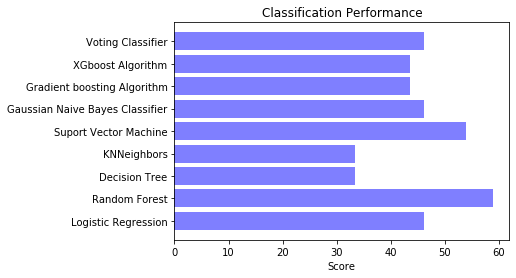

In [39]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

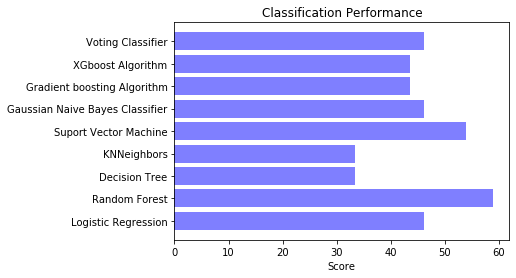

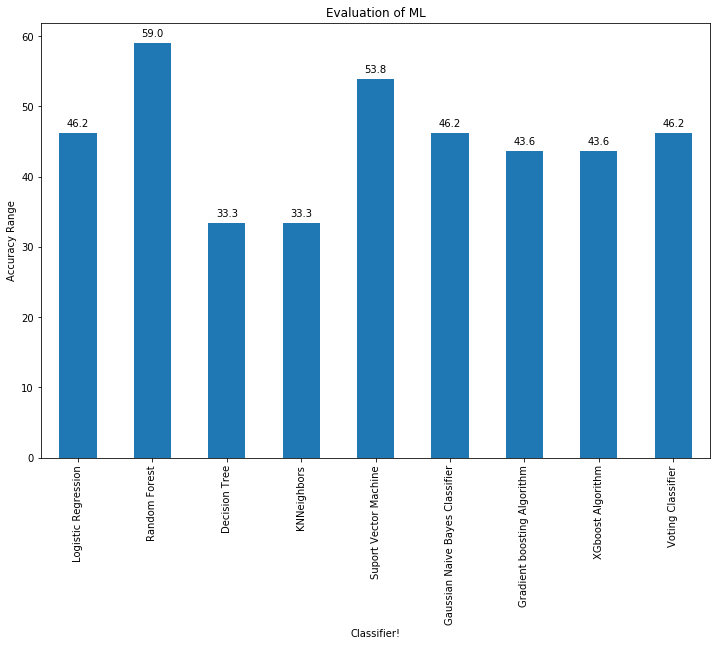

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [lr,rfc,dtc,knnc,svc,gnbc,gbc,xgbc,vc]

# In my original code I create a series and run on that,[ ]

import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)
x_labels = ['Logistic Regression','Random Forest','Decision Tree','KNNeighbors','Suport Vector Machine','Gaussian Naive Bayes Classifier','Gradient boosting Algorithm','XGboost Algorithm','Voting Classifier']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

In [41]:
import pickle

pickle.dump(sv,open('sv.pkl','wb'))

In [42]:
model = pickle.load(open('sv.pkl', 'rb'))
print(model)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [43]:
clf=model.predict([[1.0,0.0,0.0,2.0,0.06,0.00,0.04,10.0,0.0,0.0,21.0,0.0,0.04,0.00,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]])
if clf==0.0:
    output='Single-gene inheritance diseases'
elif clf==1.0:
      output='Mitochondrial genetic inheritance disorders'
elif clf==2.0:
        output='Multifactorial genetic inheritance disorders'
print(output) 

Single-gene inheritance diseases


In [44]:
#model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
#model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
#      verbose=20,eval_metric='logloss')

NameError: name 'lgb' is not defined